In [1]:
import pandas as pd
import re

In [2]:
pattern = r'^(\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s?(?:am|pm))\s-\s(?:(.*?):\s)?(.*)'

In [3]:
data = []

In [5]:
# with open("WhatsApp Chat with TY CSE(AI&ML).txt", encoding="utf-8") as f:
#     for line in f:
#         match = re.match(pattern, line.strip())
#         if match:
#             datetime = match.group(1)
#             sender = match.group(2) if match.group(2) else "System"
#             message = match.group(3)

#             data.append([sender, message , datetime])


In [5]:
df = pd.DataFrame(data, columns=["Sender" ,  "Message", "Date-Time"])

In [6]:
df.shape

(554, 3)

In [7]:
df.head()

,Sender,Message,Date-Time
0,System,Messages and calls are end-to-end encrypted. O...,"15/09/25, 11:17 pm"
1,System,"Reva Patil Mam(SY AI-ML) created group ""TY CSE...","30/06/25, 7:27 pm"
2,System,You were added,"30/06/25, 7:27 pm"
3,System,"Tushar Sir added Abhishek Kumbhar, Aditya Pati...","15/09/25, 11:18 pm"
4,Apurva Mohite Madum,Webinar details : Date: 16th September 2025 (T...,"16/09/25, 12:06 pm"


In [8]:
df["Date-Time"] = pd.to_datetime(
    df["Date-Time"],
    dayfirst=True,      # because format is DD/MM/YY
    errors="coerce"     # if something fails, it becomes NaT instead of error
)

C:\Users\Rajvardhan\AppData\Local\Temp\ipykernel_26900\587488587.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date-Time"] = pd.to_datetime(


In [9]:
# df["Formatted Time"] = df["Date + Time"].dt.strftime("%d/%m/%Y, %I:%M %p")

In [10]:
df['Year'] = df['Date-Time'].dt.year

In [11]:
df['Month'] = df['Date-Time'].dt.month_name()

In [12]:
df['Date'] = df['Date-Time'].dt.day

In [13]:
df['Hour'] = df['Date-Time'].dt.hour

In [14]:
df['Minute'] = df['Date-Time'].dt.minute

In [15]:
#findian most buiest person


In [16]:
messages_sent = df['Sender'].value_counts().head()

In [17]:
messages_sent

Sender
Apurva Mohite Madum    107
Ashwini B Patil Mam     70
+91 97421 64671         65
+91 86250 41213         59
Ashvini Patil Mam       54
Name: count, dtype: int64

In [18]:
name = messages_sent.index
count = messages_sent.values

In [19]:
import matplotlib.pyplot as plt

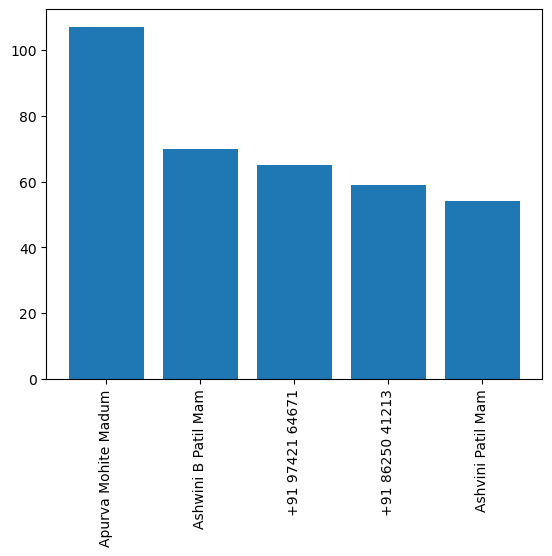

In [20]:
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [21]:
# Message percentage

In [22]:
percentage = round(( df['Sender'].value_counts() / df.shape[0] )*100 , 2).reset_index().rename(columns = {'Sender':'Name','count':'Percentage'})

In [23]:
percentage

,Name,Percentage
0,Apurva Mohite Madum,19.31
1,Ashwini B Patil Mam,12.64
2,+91 97421 64671,11.73
3,+91 86250 41213,10.65
4,Ashvini Patil Mam,9.75
5,+91 98344 96364,6.50
6,+91 92260 52460,6.32
7,+91 94238 66627,3.61
8,Ramesh Medar Sir HOD AIML,3.61
9,Pratik Mane,3.43


In [24]:
# most common words

In [25]:
temp = df[df['Message'] != '<Media omitted>']

In [26]:
temp = temp[temp['Sender'] != 'System']

In [27]:
temp

,Sender,Message,Date-Time,Year,Month,Date,Hour,Minute
4,Apurva Mohite Madum,Webinar details : Date: 16th September 2025 (T...,2025-09-16 12:06:00,2025,September,16,12,6
5,Apurva Mohite Madum,"Dear all,",2025-09-16 12:08:00,2025,September,16,12,8
6,Apurva Mohite Madum,Webinar joining details will be sent to the re...,2025-09-16 15:59:00,2025,September,16,15,59
7,+91 86250 41213,Reminder 👆,2025-09-17 11:50:00,2025,September,17,11,50
8,+91 86250 41213,Reminder 👆,2025-09-17 11:50:00,2025,September,17,11,50
...,...,...,...,...,...,...,...,...
545,+91 97421 64671,"Dear Students,",2026-02-02 18:37:00,2026,February,2,18,37
546,Apurva Mohite Madum,"Dear Students,",2026-02-03 10:22:00,2026,February,3,10,22
549,+91 92260 52460,"Dear Students,",2026-02-03 16:07:00,2026,February,3,16,7
551,+91 97421 64671,Dear Sirs/Madam,2026-02-05 15:46:00,2026,February,5,15,46


In [30]:
df

,Sender,Message,Date-Time,Year,Month,Date,Hour,Minute
0,System,Messages and calls are end-to-end encrypted. O...,2025-09-15 23:17:00,2025,September,15,23,17
1,System,"Reva Patil Mam(SY AI-ML) created group ""TY CSE...",2025-06-30 19:27:00,2025,June,30,19,27
2,System,You were added,2025-06-30 19:27:00,2025,June,30,19,27
3,System,"Tushar Sir added Abhishek Kumbhar, Aditya Pati...",2025-09-15 23:18:00,2025,September,15,23,18
4,Apurva Mohite Madum,Webinar details : Date: 16th September 2025 (T...,2025-09-16 12:06:00,2025,September,16,12,6
...,...,...,...,...,...,...,...,...
549,+91 92260 52460,"Dear Students,",2026-02-03 16:07:00,2026,February,3,16,7
550,Sandesh Bhandare(24 March),<Media omitted>,2026-02-04 20:47:00,2026,February,4,20,47
551,+91 97421 64671,Dear Sirs/Madam,2026-02-05 15:46:00,2026,February,5,15,46
552,+91 97421 64671,FSP Registration link : https://www.futureskil...,2026-02-05 15:46:00,2026,February,5,15,46


In [31]:
df['month_num'] = df['Date-Time'].dt.month

In [32]:
df

,Sender,Message,Date-Time,Year,Month,Date,Hour,Minute,month_num
0,System,Messages and calls are end-to-end encrypted. O...,2025-09-15 23:17:00,2025,September,15,23,17,9
1,System,"Reva Patil Mam(SY AI-ML) created group ""TY CSE...",2025-06-30 19:27:00,2025,June,30,19,27,6
2,System,You were added,2025-06-30 19:27:00,2025,June,30,19,27,6
3,System,"Tushar Sir added Abhishek Kumbhar, Aditya Pati...",2025-09-15 23:18:00,2025,September,15,23,18,9
4,Apurva Mohite Madum,Webinar details : Date: 16th September 2025 (T...,2025-09-16 12:06:00,2025,September,16,12,6,9
...,...,...,...,...,...,...,...,...,...
549,+91 92260 52460,"Dear Students,",2026-02-03 16:07:00,2026,February,3,16,7,2
550,Sandesh Bhandare(24 March),<Media omitted>,2026-02-04 20:47:00,2026,February,4,20,47,2
551,+91 97421 64671,Dear Sirs/Madam,2026-02-05 15:46:00,2026,February,5,15,46,2
552,+91 97421 64671,FSP Registration link : https://www.futureskil...,2026-02-05 15:46:00,2026,February,5,15,46,2


In [33]:
timeline = df.groupby(['Year','month_num','Month']).count()['Message'].reset_index()

In [34]:
timeline

,Year,month_num,Month,Message
0,2025,6,June,2
1,2025,9,September,92
2,2025,10,October,110
3,2025,11,November,60
4,2025,12,December,86
5,2026,1,January,187
6,2026,2,February,17


In [35]:
time = []

In [36]:
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i] + " - " + str(timeline['Year'][i]))

In [37]:
time

['June - 2025',
 'September - 2025',
 'October - 2025',
 'November - 2025',
 'December - 2025',
 'January - 2026',
 'February - 2026']

In [38]:
timeline['time'] = time

In [39]:
timeline

,Year,month_num,Month,Message,time
0,2025,6,June,2,June - 2025
1,2025,9,September,92,September - 2025
2,2025,10,October,110,October - 2025
3,2025,11,November,60,November - 2025
4,2025,12,December,86,December - 2025
5,2026,1,January,187,January - 2026
6,2026,2,February,17,February - 2026


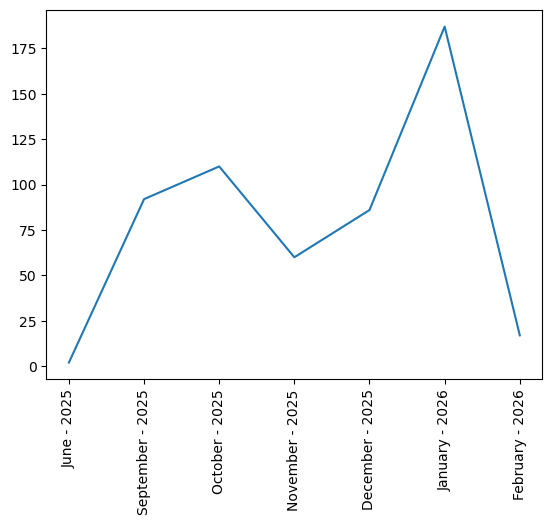

In [40]:
plt.plot(timeline['time'],timeline['Message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [41]:
# daily timeline

In [44]:
df['only_date'] = df['Date-Time'].dt.date

In [45]:
df

,Sender,Message,Date-Time,Year,Month,Date,Hour,Minute,month_num,only_date
0,System,Messages and calls are end-to-end encrypted. O...,2025-09-15 23:17:00,2025,September,15,23,17,9,2025-09-15
1,System,"Reva Patil Mam(SY AI-ML) created group ""TY CSE...",2025-06-30 19:27:00,2025,June,30,19,27,6,2025-06-30
2,System,You were added,2025-06-30 19:27:00,2025,June,30,19,27,6,2025-06-30
3,System,"Tushar Sir added Abhishek Kumbhar, Aditya Pati...",2025-09-15 23:18:00,2025,September,15,23,18,9,2025-09-15
4,Apurva Mohite Madum,Webinar details : Date: 16th September 2025 (T...,2025-09-16 12:06:00,2025,September,16,12,6,9,2025-09-16
...,...,...,...,...,...,...,...,...,...,...
549,+91 92260 52460,"Dear Students,",2026-02-03 16:07:00,2026,February,3,16,7,2,2026-02-03
550,Sandesh Bhandare(24 March),<Media omitted>,2026-02-04 20:47:00,2026,February,4,20,47,2,2026-02-04
551,+91 97421 64671,Dear Sirs/Madam,2026-02-05 15:46:00,2026,February,5,15,46,2,2026-02-05
552,+91 97421 64671,FSP Registration link : https://www.futureskil...,2026-02-05 15:46:00,2026,February,5,15,46,2,2026-02-05


In [52]:
daily_timeline = df.groupby('only_date').count()['Message'].reset_index()

In [50]:
df.groupby('only_date').count()['Message']

only_date
2025-06-30    2
2025-09-15    2
2025-09-16    3
2025-09-17    7
2025-09-18    1
             ..
2026-02-01    1
2026-02-02    8
2026-02-03    4
2026-02-04    1
2026-02-05    3
Name: Message, Length: 107, dtype: int64

In [53]:
daily_timeline

,only_date,Message
0,2025-06-30,2
1,2025-09-15,2
2,2025-09-16,3
3,2025-09-17,7
4,2025-09-18,1
...,...,...
102,2026-02-01,1
103,2026-02-02,8
104,2026-02-03,4
105,2026-02-04,1


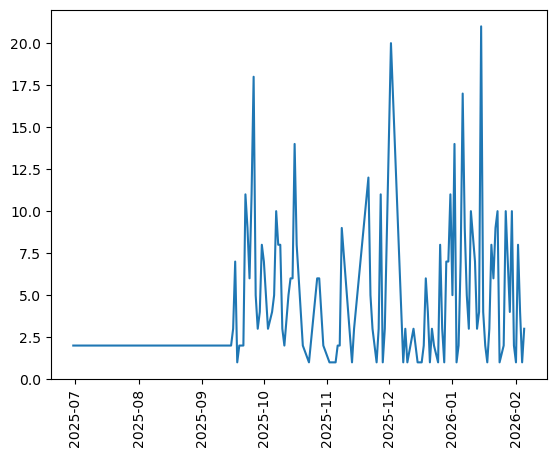

In [56]:
plt.plot(daily_timeline['only_date'],daily_timeline['Message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [57]:
# most active days 

In [67]:
df['day_name'] = df['Date-Time'].dt.day_name()

In [68]:
df['day_name'].value_counts()

day_name
Tuesday      118
Friday       107
Thursday     101
Wednesday     82
Monday        77
Saturday      50
Sunday        19
Name: count, dtype: int64

In [69]:
# most busy month

In [70]:
df['Month'].value_counts()

Month
January      187
October      110
September     92
December      86
November      60
February      17
June           2
Name: count, dtype: int64

In [71]:
df

,Sender,Message,Date-Time,Year,Month,Date,Hour,Minute,month_num,only_date,daily_msg,day_name
0,System,Messages and calls are end-to-end encrypted. O...,2025-09-15 23:17:00,2025,September,15,23,17,9,2025-09-15,NaN,Monday
1,System,"Reva Patil Mam(SY AI-ML) created group ""TY CSE...",2025-06-30 19:27:00,2025,June,30,19,27,6,2025-06-30,NaN,Monday
2,System,You were added,2025-06-30 19:27:00,2025,June,30,19,27,6,2025-06-30,NaN,Monday
3,System,"Tushar Sir added Abhishek Kumbhar, Aditya Pati...",2025-09-15 23:18:00,2025,September,15,23,18,9,2025-09-15,NaN,Monday
4,Apurva Mohite Madum,Webinar details : Date: 16th September 2025 (T...,2025-09-16 12:06:00,2025,September,16,12,6,9,2025-09-16,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
549,+91 92260 52460,"Dear Students,",2026-02-03 16:07:00,2026,February,3,16,7,2,2026-02-03,NaN,Tuesday
550,Sandesh Bhandare(24 March),<Media omitted>,2026-02-04 20:47:00,2026,February,4,20,47,2,2026-02-04,NaN,Wednesday
551,+91 97421 64671,Dear Sirs/Madam,2026-02-05 15:46:00,2026,February,5,15,46,2,2026-02-05,NaN,Thursday
552,+91 97421 64671,FSP Registration link : https://www.futureskil...,2026-02-05 15:46:00,2026,February,5,15,46,2,2026-02-05,NaN,Thursday
